In [58]:
# работа с таблицами
import numpy as np
import pandas as pd
# импорт данных
import json
# отображение текстовых данных по ширине окна
import textwrap
# проверка на наличие эмодзи
import emoji
# очистка текста
import re
import string
# лемматизация
import pymorphy3
# векторизация текста
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# метрики
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time

import matplotlib.pyplot as plt

import mplcyberpunk

plt.style.use("cyberpunk")

In [4]:
with open("/home/artemiy/nlp_project/data/restaurants_reviews.jsonl", "r") as file:
    data_list = []
    for line in file:
        data = json.loads(line)
        data_list.append(data)

In [5]:
df = pd.DataFrame(data_list)
df.head()

,review_id,general,food,interior,service,text
0,0,0,10,10,10,Вытянули меня сегодня в город и раз уж была в ...
1,1,0,9,10,9,проводили корпоратив на 60 чел. в этот - уже т...
2,2,0,9,10,10,Был в Гостях с женой один раз и еще раз с жено...
3,3,0,-,5,10,Бар понравился на первый взгляд . Интерьер к ...
4,4,0,7,10,10,В « Bel Canto » мы отмечали юбилей моего отца ...


In [59]:
df['general'].value_counts()

general
0    43940
5     2164
1      462
4      257
2      166
3      150
Name: count, dtype: int64

(array([43940.,     0.,   462.,     0.,   166.,     0.,   150.,     0.,
          257.,  2164.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

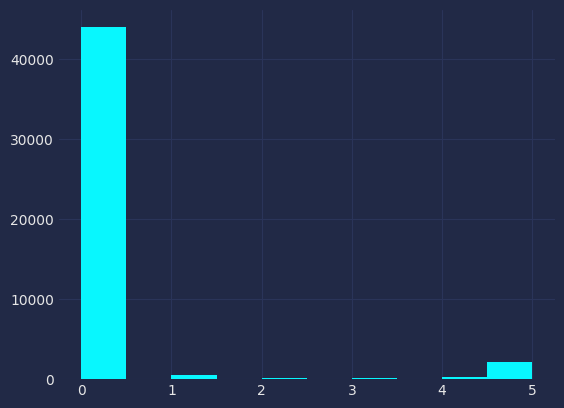

In [60]:
plt.hist(df['general'])

In [6]:
print(textwrap.fill(df['text'][13100]))

26 декабря отмечала День Рождение в этом самом ресторане .  Выбирала
очень тщательно и придирчиво .  Я не из любителей поесть , так что
главной меркой для меня был интерьер , уют и комфорт , чтобы тихо и
спокойно отметить вместе с семьей .  А если еда итальянская - еще
лучше .  Металась между другим рестораном и " Luce " , очень хотела
посетить панорамный ресторан , отказалась от первого , так как тот
администратор сказал , что столиков около окон свободных на вечер
26-ого декабря , которое выпадало на среду , не будет , ну что ж ,
решила Люче так Люче , тем более что и интерьером он намного лучше и
выше уровнем .  Действительно , фотографии не обманули - интерьер
поистине шикарный , и приглушенный свет , и удобные наимягчайшие
кресла , и неназойливые официанты радовали .  НО !!! подпортило
абсолютно весь вечер вот что : тот самый единственный панорамный
столик в этом маленьком ресторане , на который я и претендовала ,
оказался занят .  Тот единственный столик , ради которого я и шла в

In [7]:
with open(
    "/home/artemiy/nlp_project/data/stopwords-ru.txt", "r", encoding="utf-8"
) as file:
    stop_words = set(file.read().split())

In [8]:
def has_emoji(text):
    for character in text:
        if character in emoji.demojize(text):
            return 'эмодзи детектед'
    return 'эмодзи не обнаружен'

In [9]:
len(has_emoji(df['text']))

15

In [10]:
emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "\U00002700-\U000027BF"  # Dingbats
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U00002600-\U000026FF"  # Miscellaneous Symbols
    "\U00002B50-\U00002B55"  # Miscellaneous Symbols and Pictographs
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U0001F700-\U0001F77F"  # Alchemical Symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "]+",
    flags=re.UNICODE,
)

In [11]:
def clean(text, stop__words):
    text = text.lower()  # нижний регистр
    text = re.sub(r"http\S+", " ", text)  # удаляем ссылки
    text = re.sub(r"@\w+", " ", text)  # удаляем упоминания пользователей
    text = re.sub(r"#\w+", " ", text)  # удаляем хэштеги
    text = re.sub(r"\d+", " ", text)  # удаляем числа
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"<.*?>", " ", text)  #
    text = re.sub(r"[️«»—]", " ", text)
    text = re.sub(r"[^а-яё ]", " ", text)
    text = text.lower()
    text = emoji_pattern.sub(r"", text)
    text = " ".join([word for word in text.split() if word not in stop__words])
    return text

In [12]:
clean_text = [clean(text, stop_words) for text in df["text"]]

In [13]:
print(textwrap.fill(clean_text[1310]))

ждали друзей приезжали московский вокзал решили поесть баклажане меню
большое яркое фотографиями определенно помогает разобраться блюдо
заказала медальоны баклажанов плов подруга сациви хачапури поаджарски
хинкали напитков выбрали байский чай деле порадовал вкусный необычный
принесли комплимент маленькую лепешку соус еда понравилась подача
плова улыбчивый узбек подходит столу располагается небольшом столике
накладывает плов небольшого казана путешествия сказались температуре
плова деле вкусным узбек предлагает положить чеснок лук помидоры
огурцы люблю чеснок плова улыбчивый мужчина искренне обиделся
отказалась деле чеснок вкусным обслуживание ужасным юноша обслуживал
минуты редкого появления вроде соответствиями стандартами обслуживания
редко находился зале просили подряд принести приборы дозаказать
сметану хинкали счет


In [14]:
morph = pymorphy3.MorphAnalyzer()

In [15]:
def lemmatize(text):
    words = text.split()
    lem_words = [morph.parse(word)[0].normal_form for word in words]
    return " ".join(lem_words)

In [16]:
lem_text = [lemmatize(text) for text in clean_text]

In [17]:
print(textwrap.fill(clean_text[1310]))

ждали друзей приезжали московский вокзал решили поесть баклажане меню
большое яркое фотографиями определенно помогает разобраться блюдо
заказала медальоны баклажанов плов подруга сациви хачапури поаджарски
хинкали напитков выбрали байский чай деле порадовал вкусный необычный
принесли комплимент маленькую лепешку соус еда понравилась подача
плова улыбчивый узбек подходит столу располагается небольшом столике
накладывает плов небольшого казана путешествия сказались температуре
плова деле вкусным узбек предлагает положить чеснок лук помидоры
огурцы люблю чеснок плова улыбчивый мужчина искренне обиделся
отказалась деле чеснок вкусным обслуживание ужасным юноша обслуживал
минуты редкого появления вроде соответствиями стандартами обслуживания
редко находился зале просили подряд принести приборы дозаказать
сметану хинкали счет


In [18]:
print(textwrap.fill(lem_text[130]))

жаловаться отвратительный работа ресторанапивоварня балтика брю
расположить адрес ул больший морской ходить вечером заставить
заплатить разбитый посуда какоголибо акт счёт руб оплатить охрана
предупредить охрана давать преградить хамить оскорблять ч матерно
вступить драка ход пострадать ребята сильно избить девушка девушка
увезти скорый ребята повезти травма вызвать полиция написать заявление
заплатить заведение результат получить морда


In [19]:
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
)

X_tfidf = vectorizer.fit_transform(lem_text)

In [20]:
print(f"Shape of TF-IDF matrix: {X_tfidf.shape}")

Shape of TF-IDF matrix: (47139, 24678)


In [21]:
y = df['general'].values

In [22]:
y.shape

(47139,)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [62]:
clf = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [63]:
y_pred = clf.predict(X_test)

In [64]:
accuracy_on_reviews_logreg = accuracy_score(y_test, y_pred)
print(f"accuracy = {accuracy_on_reviews_logreg}")

accuracy = 0.769622401357658


In [65]:
f1_on_reviews_logreg = f1_score(y_test, y_pred, average='weighted')
print(f"f1 score = {f1_on_reviews_logreg}")

f1 score = 0.8237539521587526


In [47]:
rating_dict = {
    0: "Отвратительно! Даже не подходите к этому месту!",
    1: "Плохо! Лучше бы остался дома.",
    2: "Удовлетворительно, но не без недостатков. Ешьте на свой страх и риск.",
    3: "Хорошо! Вполне достойное место для трапезы.",
    4: "Отлично! Обязательно вернусь еще раз.",
    5: "Великолепно! Как в раю, только с едой.",
}

In [53]:
test_reviews = {
    0: [
        "Еда была ужасной, а обслуживание еще хуже. Никогда сюда больше не вернусь!",
       ],
    1: [
        "Еда была не очень, и обслуживание оставляет желать лучшего."
    ],
    2: [
        "Неплохо, но могло быть и лучше."
    ],
    3: [
        "Хорошее место, вернусь еще раз."
    ],
    4: [
        "Отличное место! Очень доволен."
    ],
    5: [
        "Великолепно! Как в раю, только с едой."
    ],
}

In [73]:
# Функция предсказания
def predict_review(review):
    start_time = time.time()

    # Очистка и лемматизация текста
    clean_text = clean(review, stop_words)
    lem_text = lemmatize(clean_text)

    # Преобразование текста в TF-IDF представление
    X_new = vectorizer.transform([lem_text])

    # Предсказание
    prediction = clf.predict(X_new)[0]

    # Проверка допустимости предсказания
    if prediction not in rating_dict:
        rating = "Ошибка предсказания"
    else:
        rating = rating_dict[prediction]

    # Измерение времени
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Лейбл: {prediction}")
    print(f"Оценка отзыва: {rating}")
    print(f"Затраченное время: {elapsed_time:.6f} seconds")
    print()

In [74]:
for rating, reviews in test_reviews.items():
    print(f"Testing reviews with expected rating {rating}:")
    for review in reviews:
        result = predict_review(review)
        print(result)

Testing reviews with expected rating 0:
Лейбл: 1
Оценка отзыва: Плохо! Лучше бы остался дома.
Затраченное время: 0.000853 seconds

None
Testing reviews with expected rating 1:
Лейбл: 0
Оценка отзыва: Отвратительно! Даже не подходите к этому месту!
Затраченное время: 0.000685 seconds

None
Testing reviews with expected rating 2:
Лейбл: 0
Оценка отзыва: Отвратительно! Даже не подходите к этому месту!
Затраченное время: 0.000513 seconds

None
Testing reviews with expected rating 3:
Лейбл: 0
Оценка отзыва: Отвратительно! Даже не подходите к этому месту!
Затраченное время: 0.000438 seconds

None
Testing reviews with expected rating 4:
Лейбл: 5
Оценка отзыва: Великолепно! Как в раю, только с едой.
Затраченное время: 0.000389 seconds

None
Testing reviews with expected rating 5:
Лейбл: 0
Оценка отзыва: Отвратительно! Даже не подходите к этому месту!
Затраченное время: 0.000444 seconds

None


In [75]:
review = "Достойное обслуживание и приятная атмосфера. В целом нормально"
print(predict_review(review))

Лейбл: 4
Оценка отзыва: Отлично! Обязательно вернусь еще раз.
Затраченное время: 0.001250 seconds

None


In [78]:
predict_review('Место полное говно, больше никогда в жизни сюда не приду. Еда отвратительная. Официантка красивая. Хлеб свежий')

Лейбл: 2
Оценка отзыва: Удовлетворительно, но не без недостатков. Ешьте на свой страх и риск.
Затраченное время: 0.001238 seconds

